## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
model.summary()

sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 設定要訓練的 Epoch 數
epochs = 500
model.fit(x_train, y_train, epochs=epochs, batch_size=256, validation_data=(x_test, y_test), shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 51us/step - loss: 1.8575 - acc: 0.3352 - val_loss: 1.7098 - val_acc: 0.3926
Epoch 2/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.6422 - acc: 0.4176 - val_loss: 1.6406 - val_acc: 0.4220
Epoch 3/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.5525 - acc: 0.4486 - val_loss: 1.5893 - val_acc: 0.4375
Epoch 4/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.4910 - acc: 0.4736 - val_loss: 1.5080 - val_acc: 0.4636
Epoch 5/500
50000/50000 [==============================] - 2s 42us/step - loss: 1.4408 - acc: 0.4894 - val_loss: 1.4880 - val_acc: 0.4642
Epoch 6/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.3995 - acc: 0.5046 - val_loss: 1.5562 - val_acc: 0.4570
Epoch 7/500
50000/50000 [==============================] - 2s 43us/step - loss: 1.3679 - acc: 0.5164 - val_loss: 1.4586 - 

50000/50000 [==============================] - 2s 41us/step - loss: 0.2979 - acc: 0.8945 - val_loss: 2.2849 - val_acc: 0.5272
Epoch 60/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2895 - acc: 0.8993 - val_loss: 2.3704 - val_acc: 0.5304
Epoch 61/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2847 - acc: 0.8988 - val_loss: 2.5843 - val_acc: 0.4959
Epoch 62/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2923 - acc: 0.8970 - val_loss: 2.3315 - val_acc: 0.5315
Epoch 63/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2617 - acc: 0.9075 - val_loss: 2.3798 - val_acc: 0.5298
Epoch 64/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2662 - acc: 0.9062 - val_loss: 2.3370 - val_acc: 0.5274
Epoch 65/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.2491 - acc: 0.9135 - val_loss: 2.5865 - val_acc: 0.5152
Epoch 66/500
50000/50000 [==============

Epoch 118/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1239 - acc: 0.9561 - val_loss: 3.6402 - val_acc: 0.5199
Epoch 119/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1061 - acc: 0.9630 - val_loss: 3.5373 - val_acc: 0.5281
Epoch 120/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1166 - acc: 0.9594 - val_loss: 3.6177 - val_acc: 0.5282
Epoch 121/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1101 - acc: 0.9605 - val_loss: 3.7101 - val_acc: 0.5129
Epoch 122/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.1046 - acc: 0.9625 - val_loss: 3.7235 - val_acc: 0.5247
Epoch 123/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0823 - acc: 0.9722 - val_loss: 3.5958 - val_acc: 0.5329
Epoch 124/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0704 - acc: 0.9757 - val_loss: 3.5851 - val_acc: 0.5272
Epoch 125/500
50000/

50000/50000 [==============================] - 2s 41us/step - loss: 0.0321 - acc: 0.9888 - val_loss: 4.1908 - val_acc: 0.5288
Epoch 177/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0590 - acc: 0.9799 - val_loss: 3.9723 - val_acc: 0.5318
Epoch 178/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0653 - acc: 0.9772 - val_loss: 4.0458 - val_acc: 0.5338
Epoch 179/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0614 - acc: 0.9790 - val_loss: 4.0428 - val_acc: 0.5397
Epoch 180/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0403 - acc: 0.9868 - val_loss: 4.1583 - val_acc: 0.5308
Epoch 181/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0648 - acc: 0.9782 - val_loss: 4.0801 - val_acc: 0.5365
Epoch 182/500
50000/50000 [==============================] - 2s 41us/step - loss: 0.0437 - acc: 0.9851 - val_loss: 4.1135 - val_acc: 0.5361
Epoch 183/500
50000/50000 [=======

50000/50000 [==============================] - 2s 41us/step - loss: 2.8973e-04 - acc: 1.0000 - val_loss: 4.2687 - val_acc: 0.5547
Epoch 235/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.1059e-04 - acc: 1.0000 - val_loss: 4.2724 - val_acc: 0.5541
Epoch 236/500
50000/50000 [==============================] - 2s 41us/step - loss: 2.6993e-04 - acc: 1.0000 - val_loss: 4.2798 - val_acc: 0.5552
Epoch 237/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.9132e-04 - acc: 1.0000 - val_loss: 4.2827 - val_acc: 0.5549
Epoch 238/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7387e-04 - acc: 1.0000 - val_loss: 4.2883 - val_acc: 0.5551
Epoch 239/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.7273e-04 - acc: 1.0000 - val_loss: 4.2953 - val_acc: 0.5544
Epoch 240/500
50000/50000 [==============================] - 2s 41us/step - loss: 1.6843e-04 - acc: 1.0000 - val_loss: 4.2948 - val_acc: 0.5544
Epoch 

Epoch 291/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.5219e-05 - acc: 1.0000 - val_loss: 4.3739 - val_acc: 0.5556
Epoch 292/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.5358e-05 - acc: 1.0000 - val_loss: 4.3738 - val_acc: 0.5561
Epoch 293/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.3822e-05 - acc: 1.0000 - val_loss: 4.3753 - val_acc: 0.5560
Epoch 294/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.3658e-05 - acc: 1.0000 - val_loss: 4.3762 - val_acc: 0.5557
Epoch 295/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.3099e-05 - acc: 1.0000 - val_loss: 4.3775 - val_acc: 0.5555
Epoch 296/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.2166e-05 - acc: 1.0000 - val_loss: 4.3778 - val_acc: 0.5556
Epoch 297/500
50000/50000 [==============================] - 2s 41us/step - loss: 7.1915e-05 - acc: 1.0000 - val_loss: 4.3788 - val_acc:

Epoch 348/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.3229e-05 - acc: 1.0000 - val_loss: 4.4144 - val_acc: 0.5562
Epoch 349/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.2947e-05 - acc: 1.0000 - val_loss: 4.4148 - val_acc: 0.5559
Epoch 350/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.2966e-05 - acc: 1.0000 - val_loss: 4.4155 - val_acc: 0.5564
Epoch 351/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.2486e-05 - acc: 1.0000 - val_loss: 4.4161 - val_acc: 0.5563
Epoch 352/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.2214e-05 - acc: 1.0000 - val_loss: 4.4161 - val_acc: 0.5564
Epoch 353/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.1970e-05 - acc: 1.0000 - val_loss: 4.4171 - val_acc: 0.5559
Epoch 354/500
50000/50000 [==============================] - 2s 41us/step - loss: 5.1647e-05 - acc: 1.0000 - val_loss: 4.4185 - val_acc:

Epoch 405/500
50000/50000 [==============================] - 2s 42us/step - loss: 4.2226e-05 - acc: 1.0000 - val_loss: 4.4411 - val_acc: 0.5560
Epoch 406/500
50000/50000 [==============================] - 2s 41us/step - loss: 4.2054e-05 - acc: 1.0000 - val_loss: 4.4427 - val_acc: 0.5554
Epoch 407/500
50000/50000 [==============================] - 2s 41us/step - loss: 4.1964e-05 - acc: 1.0000 - val_loss: 4.4421 - val_acc: 0.5559
Epoch 408/500
50000/50000 [==============================] - 2s 41us/step - loss: 4.1887e-05 - acc: 1.0000 - val_loss: 4.4430 - val_acc: 0.5556
Epoch 409/500
50000/50000 [==============================] - 2s 41us/step - loss: 4.1642e-05 - acc: 1.0000 - val_loss: 4.4428 - val_acc: 0.5561
Epoch 410/500
50000/50000 [==============================] - 2s 41us/step - loss: 4.1467e-05 - acc: 1.0000 - val_loss: 4.4436 - val_acc: 0.5557
Epoch 411/500
50000/50000 [==============================] - 2s 41us/step - loss: 4.1336e-05 - acc: 1.0000 - val_loss: 4.4434 - val_acc:

Epoch 462/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.5538e-05 - acc: 1.0000 - val_loss: 4.4620 - val_acc: 0.5556
Epoch 463/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.5308e-05 - acc: 1.0000 - val_loss: 4.4618 - val_acc: 0.5559
Epoch 464/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.5273e-05 - acc: 1.0000 - val_loss: 4.4626 - val_acc: 0.5556
Epoch 465/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.5165e-05 - acc: 1.0000 - val_loss: 4.4624 - val_acc: 0.5561
Epoch 466/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.5093e-05 - acc: 1.0000 - val_loss: 4.4627 - val_acc: 0.5558
Epoch 467/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.5096e-05 - acc: 1.0000 - val_loss: 4.4631 - val_acc: 0.5556
Epoch 468/500
50000/50000 [==============================] - 2s 41us/step - loss: 3.4900e-05 - acc: 1.0000 - val_loss: 4.4633 - val_acc:

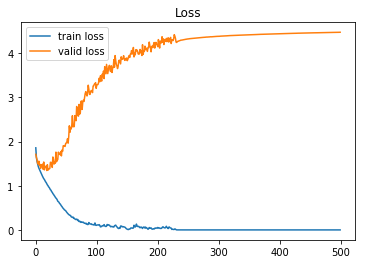

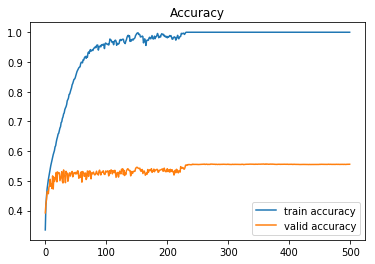

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()